In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])
#print(cov_01)

In [17]:
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


In [18]:
#dist_02

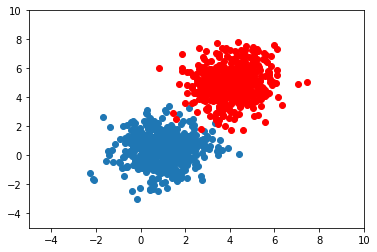

In [19]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='red')
plt.show()

In [20]:
dist_01.shape

(500, 2)

In [21]:
dist_02.shape

(500, 2)

In [22]:
r = dist_01.shape[0] + dist_01.shape[0]
c = dist_01.shape[1] + 1
data = np.zeros((r,c))

In [23]:
data.shape

(1000, 3)

In [24]:
data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0


In [25]:
np.random.shuffle(data)
data[:10]

array([[ 2.39070857,  0.96556508,  0.        ],
       [ 3.98053999,  4.29645242,  1.        ],
       [ 0.12015332,  0.16797777,  0.        ],
       [ 3.66764665,  0.40062184,  0.        ],
       [ 4.14898851,  4.32822864,  1.        ],
       [-0.6009817 , -0.70596406,  0.        ],
       [ 0.66089089,  0.24417103,  0.        ],
       [ 4.83408751,  5.32458077,  1.        ],
       [ 4.04547108,  4.27754104,  1.        ],
       [ 3.79916644,  3.44538879,  1.        ]])

In [26]:
def distance(point1, point2):
    d = np.sqrt(((point1-point2)**2).sum())
    return d

In [27]:
def knn(points, labels, xt, k=7):
    vals = [] #distance and label of each point to the test point 
    for ix in range(points.shape[0]): #for each point in data
        d = distance(points[ix], xt)
        vals.append([d, labels[ix]]) #vals is a list of lists -> each sublist is [distance, class]
    sorted_vals = sorted(vals, key = lambda x: x[0]) # x[0] is the distance. sorting on the basis of distance
    neighbours = np.array(sorted_vals)[:k, -1] # neighbours would contain the labels of closest k points
    # [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0] 
    freq = np.unique(neighbours, return_counts=True) #finding the value which occurs most frequently
    return freq[0][freq[1].argmax()]

In [28]:
test_point = np.array([8, 4])

In [29]:
knn(data[:, :2], data[:, -1], test_point, k=10)

1.0

In [4]:
freq = np.unique([1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0] , return_counts=True)

In [10]:
freq[1]

array([4, 3])

In [9]:
freq[1].argmax()

0

In [12]:
freq[0][freq[1].argmax()]

0.0

In [1]:
list1 = [1, 2, 3, 4]
list1.append([5, 6, 7])
len(list1)

5

In [2]:
list1

[1, 2, 3, 4, [5, 6, 7]]

In [3]:
my_tuple = (1, 2, 3, 4)
my_tuple.append((5, 6, 7))
len(my_tuple)

AttributeError: 'tuple' object has no attribute 'append'